In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from sklearn import linear_model, metrics

/tmp/ipykernel_38841/1862753770.py:20: DtypeWarning: Columns (17,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  mydf=pd.read_csv('test.csv',  sep=',')


                                                   smiles           mz  \
0       CC(C)CC1NC(=O)C(C)NC(=O)C(=C)N(C)C(=O)CCC(NC(=...   289.286377   
1                                                     NaN   295.545288   
2                                                     NaN   298.489624   
3                                                     NaN   317.324951   
4                                                     NaN   319.655945   
...                                                   ...          ...   
101746                                                NaN  1377.568481   
101747                                                NaN  1395.106567   
101748                                                NaN  1396.009300   
101749                                                NaN  1397.523438   
101750                                                NaN   208.000000   

              mw    alogp  hba  hbd     psa  rotb  arom  alerts  ...  Nr-ahr  \
0        981.162  0.17397   14 

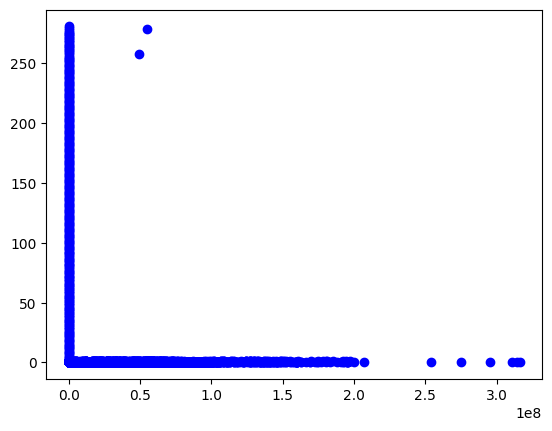

101751 101751
[46412 46413 46414 46415 46416 46417 46418 46419 46420 46421 46422 46423
 46424 46425 46426 46427 46428 46429 46430 46431 46432 46433 46434 46435
 46436 46437 46438 46439 46440 46441 46442 46443 46444 46445 46446 46447
 46448 46449 46450 46451 46452 46453 46454 46455 46456 46457 46458 46459
 46460 46461 46462 46463 46464 46465 46466 46467 46468 46469 46470 46471
 46472 46473 46474 46475 46476 46477 46478 46479 46480 46481 46482 46483
 46484 46485 46486 46487 46488 46489 46490 46491 46492 46493 46494 46495
 46496 46497 46498 46499 46500 46501 46502 46503 46504 46505 46506 46507
 46508 46509 46510 46511 46512 46513 46514 46515 46516 46517 46518 46519
 46520 46521 46522 46523 46524 46525 46526 46527 46528 46529 46530 46531
 46532 46533 46534 46535 46536 46537 46538 46539 46540 46541 46542 46543
 46544 46545 46546 46547 46548 46549 46550 46551 46552 46553 46554 46555
 46556 46557 46558 46559 46560 46561 46562 46563 46564 46565 46566 46567
 46568 46569 46570 46571 46572 46573 

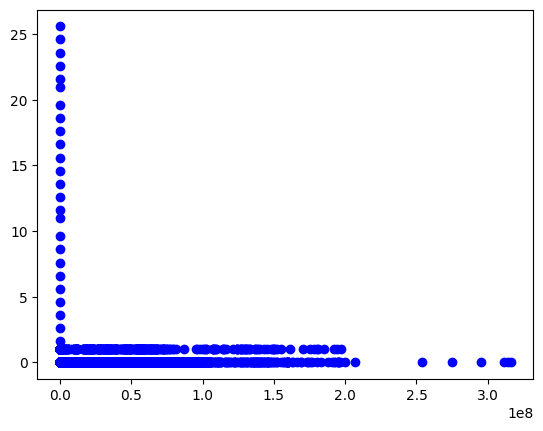

In [1653]:
import decimal
from decimal import Decimal
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
np.set_printoptions(suppress=True)

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
mydf=pd.read_csv('test.csv',  sep=',')
mydf.columns=['smiles','mz','mw','alogp','hba','hbd','psa','rotb','arom','alerts','qed','npscore','chelator','Nr-ar','Nr-ar-lbd','Nr-ahr','Nr-aromatase','Nr-er','Nr-er-lbd','Nr-ppar-gamma','Sr-are','Sr-atad5','Sr-hse','Sr-mmp','Sr-p53']

#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']

# Initialize lists and set random seed
print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1)
list_y = mydf['Nr-ar'].to_numpy().reshape(-1,1)
list_x_pred = []
list_y_real = []

np.set_printoptions(precision = 3, suppress = True)

list_y = np.nan_to_num(list_y)

list_x = np.nan_to_num(list_x)

        
list_y=pd.DataFrame(list_y)
list_x=pd.DataFrame(list_x)
list_x.to_csv()
list_y.to_csv('myyvalues.csv')
print(list_y.min())
print(list_y.max())
list_ymean=list_y.mean()
list_ystd=list_y.std()

import matplotlib.pyplot as plt
plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()


from scipy import stats
z = np.abs(stats.zscore(list_y)) 
threshold = 3
 
# Position of the outlier
outliers=np.where(z > 3)
print(len(list_x), len(list_y))
print(outliers[0])
print(len(outliers[0]))

list_x.drop(outliers[0],inplace = True)


list_y.drop(outliers[0],inplace = True)
print(len(list_x), len(list_y))

plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()

In [1654]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [562]:
# ####################
# Fit regression model
train_size = 100 # Change here to try different amounts of data
krr = GridSearchCV(KernelRidge(kernel='rbf',alpha=100),
                  param_grid={"gamma": np.logspace(-400, 400, 2)})

krr.fit(list_x[:train_size], list_y[:train_size])

print('Best gamma from CV: ',krr.best_params_)
print('Length scale =',1/np.sqrt(2*krr.best_params_['gamma']))
krr.score(list_x, list_y )

/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/numpy/core/function_base.py:284: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)
/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/patrickchi

Best gamma from CV:  {'gamma': 0.0}
Length scale = inf


-0.2830739265336444

(0, 0)


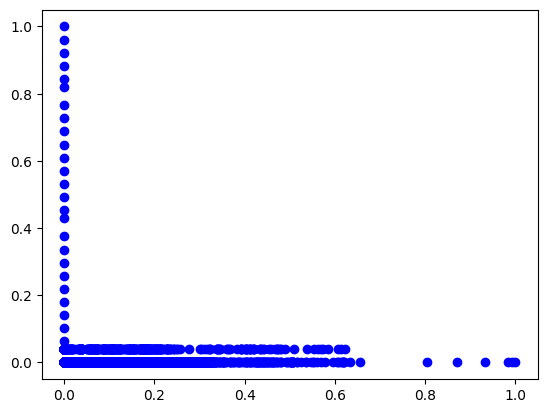

In [1655]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

X_plot = np.linspace(0, 10, 1000)[:, None]
#scaler = preprocessing.StandardScaler()
scaler = MinMaxScaler()
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)
print(minmax(list_y))
list_x = scaler.fit_transform(list_x)
list_y = scaler.fit_transform(list_y)
import matplotlib.pyplot as plt
plt.scatter(list_x, list_y, c ="blue")
 
# To show the plot
plt.show()



In [1656]:
xtrain, xtest, ytrain, ytest=train_test_split(list_x, list_y, test_size=0.15)

In [1657]:
import numpy as np
import pandas as pd

# For chapter 4
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For chapter 5
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import time

# For chapter 6
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV



In [1658]:
scaler = StandardScaler()

scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

trainX, testX, trainY, testY = train_test_split(xtrain, ytrain, test_size = 0.2)
testY

array([[0.   ],
       [0.   ],
       [0.   ],
       ...,
       [0.039],
       [0.   ],
       [0.   ]])

In [1659]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


In [1630]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [1631]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings

ModuleNotFoundError: No module named 'seaborn'

In [1162]:
warnings.filterwarnings('ignore')

NameError: name 'warnings' is not defined

In [1163]:


%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)
 


NameError: name 'sns' is not defined

In [13]:
X_plot = np.linspace(0, 10, 1000)[:, None]
scaler = preprocessing.StandardScaler()
list_x = scaler.fit_transform(list_x)
list_y = np.nan_to_num(list_y)

list_x = np.nan_to_num(list_x)

list_y=np.asarray(list_y)

list_y=list_y.reshape(1, -1)
list_y = scaler.fit_transform(list_y)
list_y
n_samples, n_features = 1, 5
#krr = KernelRidge(alpha=5)
#krr.fit(list_x, list_y)
#predy=krr.predict(list_x)
#krr.score(list_y, predy )
ridge = linear_model.Ridge(alpha=4)
lasso = linear_model.Lasso(alpha=.1)

# ####################
# Fit regression model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(trainX, trainY)


#score
print(lasso_cv.score(trainX, trainY))
print(lasso_cv.score(testX, testY))


elastic = linear_model.ElasticNet(alpha=10, l1_ratio=.5, random_state=0, normalize=True)
lasso_lars = linear_model.LassoLars(alpha=.1)
bayesian_ridge = linear_model.BayesianRidge()
logistic = linear_model.LogisticRegression(solver='liblinear')
sgd = linear_model.SGDRegressor()

models = [ridge, lasso, elastic, lasso_lars, bayesian_ridge, logistic, sgd]



/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0008886409222899072
0.0009588383006862156


TypeError: ElasticNet.__init__() got an unexpected keyword argument 'normalize'

In [14]:
trainX.reshape(1, -1)

ridge.fit(trainX, trainY, sample_weight=2)
lasso.fit(trainX, trainY)
elastic.fit(trainX, trainY)
lasso_lars.fit(trainX, trainY)
bayesian_ridge.fit(trainX, trainY, sample_weight=.02)
sgd.fit(trainX,trainY)

NameError: name 'elastic' is not defined

In [15]:
ypredridge=ridge.predict(testX)
ypredlasso=lasso.predict(testX)
ypredelastic=elastic.predict(testX)
ypredlassolars = lasso_lars.predict(testX)
ypredbayesian=bayesian_ridge.predict(testX)
sgdpredict=sgd.predict(testX)

NameError: name 'elastic' is not defined

In [16]:
testY[~np.isfinite(testY)] = 0
ypredridge[~np.isfinite(ypredridge)] = 0


sgdscore = sgd.score(testY, ypredridge)
print("R-squared:", sgdscore)

NameError: name 'sgd' is not defined

In [17]:

score = bayesian_ridge.score(testY, ypredridge)
print("R-squared:", score)

NameError: name 'bayesian_ridge' is not defined

In [18]:
lasso_lars.score(testY, ypredlassolars)



NameError: name 'lasso_lars' is not defined

In [19]:
elastic.score(testY, ypredelastic)

NameError: name 'elastic' is not defined

In [20]:
lasso.score(testY, ypredlasso)



1.0

In [21]:
ridge.score(testY, ypredridge)

-0.0010852145061714946

In [22]:
trainX

array([[-0.308],
       [ 0.367],
       [ 1.289],
       ...,
       [-1.172],
       [-0.24 ],
       [-1.07 ]])

In [23]:
testY

array([[0.   ],
       [0.   ],
       [0.   ],
       ...,
       [0.031],
       [0.008],
       [0.016]])

In [24]:
ypred=lasso.predict(testX)

#z = (x - u) / s
#where u is mean and s is standard dev


print( "Predicted values ", np.round( ypred[:10], 10 ) ) 



Predicted values  [0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008]


In [25]:
df_preds = pd.DataFrame({'Actual': testY.squeeze(), 'Predicted': ypred.squeeze()})
print(df_preds)
df_preds.to_csv('mypreds.csv')

         Actual  Predicted
0      0.000000    0.00785
1      0.000000    0.00785
2      0.000000    0.00785
3      0.015625    0.00785
4      0.000000    0.00785
...         ...        ...
17250  0.023438    0.00785
17251  0.000000    0.00785
17252  0.031250    0.00785
17253  0.007812    0.00785
17254  0.015625    0.00785

[17255 rows x 2 columns]


In [1660]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(testY, ypred)
mse = mean_squared_error(testY, ypred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.14f}')
print(f'Mean squared error: {mse:.14f}')
print(f'Root mean squared error: {rmse:.5f}')

mydf=pd.read_csv('compound4.csv', sep=',')

mydf.columns=['molecule','number','FDA','approved','name','mz','smiles','mw','alogp','hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed','pains','fsp3','cacao','half','life','logs','logd', 'bioconcen', 'igc50', 'lc50fm', 'lc50dm', 'npscore', 'chelator', 'Nr-ar', 'Nr-arlbd', 'Nr-ahr', 'Nr-aromatase', 'Nr-er', 'Nr-er-lbd', 'Nr-ppar-gamma', 'Sr-are', 'Sr-atad5', 'Sr-hse', 'Sr-mmp', 'Sr-p53'] #mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']


print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1) 
list_y = mydf['Nr-ar'].to_numpy().reshape(-1,1) 
list_x_pred = [] 
list_y_real = []

np.set_printoptions(precision = 5, suppress = True)

list_ya = np.nan_to_num(list_y)

list_xa = np.nan_to_num(list_x)

list_y=pd.DataFrame(list_y)

ymean=list_y.mean()
ystd=list_y.std()
mydf['Nr-ar']





Mean absolute error: 0.01304119366373
Mean squared error: 0.00031347888203
Root mean squared error: 0.01771
    molecule       number       FDA                                approved  \
0        4.0  zalcitabine   44.8000  C1C[C@@H](O[C@@H]1CO)N2C=CC(=NC2=O)N     
1        NaN          NaN   50.1000                                     NaN   
2        NaN          NaN   55.0000                                     NaN   
3        NaN          NaN   57.3000                                     NaN   
4        NaN          NaN   59.0000                                     NaN   
5        NaN          NaN   68.0000                                     NaN   
6        NaN          NaN   69.3000                                     NaN   
7        NaN          NaN   71.0000                                     NaN   
8        NaN          NaN   71.4000                                     NaN   
9        NaN          NaN   73.0000                                     NaN   
10       NaN          N

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
Name: Nr-ar, dtype: int64

# mydf=pd.read_csv('compound18.csv', sep=',')
mydf.columns=['molecule','number','FDA','approved','name','mz','smiles','mw','alogp','hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed','pains','fsp3','cacao','half','life','logs','logd', 'bioconcen', 'igc50', 'lc50fm', 'lc50dm', 'npscore', 'chelator', 'Nr-ar', 'Nr-arlbd',	'Nr-ahr', 'Nr-aromatase', 'Nr-er', 'Nr-er-lbd', 'Nr-ppar-gamma', 'Sr-are', 'Sr-atad5', 'Sr-hse', 'Sr-mmp', 'Sr-p53']
#mydf.columns=['molecule number', 'FDA approved name', 'mz', 'smiles', 'mw', 'alogp', 'hba', 'hbd', 'psa', 'rotb', 'arom', 'alerts', 'qed', 'fraction sp3 hybridized carbons']

# Initialize lists and set random seed
print(mydf)
list_x = mydf['mz']

list_x=list_x.astype(float)
list_x=list_x.to_numpy().reshape(-1,1)
list_y = mydf['chelator'].to_numpy().reshape(-1,1)
list_x_pred = []
list_y_real = []

np.set_printoptions(precision = 5, suppress = True)

list_ya = np.nan_to_num(list_y)

list_xa = np.nan_to_num(list_x)

        
list_y=pd.DataFrame(list_y)

ymean=list_y.mean()
ystd=list_y.std()
mydf['chelator']

In [1661]:

#scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=preprocessing.MinMaxScaler()
list_x = scaler.fit_transform(list_x)
list_y = scaler.fit_transform(list_y)


In [1662]:
ypredridge=ridge.predict(list_x)
ypredlasso=elastic.predict(list_x)

ypredelastic=elastic.predict(list_x)
ypredlassolars = lasso_lars.predict(list_x)
ypredbayesian=bayesian_ridge.predict(list_x)
sgdpredict=sgd.predict(list_x)

yhat = scaler.inverse_transform(ypredlasso)
print(yhat)


ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [1663]:
yhat.mean()

0.49905822

In [1664]:
df_preds = pd.DataFrame({'Actual': list_y.squeeze(), 'Predicted': yhat.squeeze()})
print(df_preds)

ValueError: Per-column arrays must each be 1-dimensional

In [1665]:
#z = (x - u) / s
#where u is mean and s is standard dev
myval=ypredlasso[0] * list_ystd + list_ymean

print(myval)


0    0.674902
dtype: float64


In [1666]:


.000815 * 5.681747e-17 + 0.149406

0.149406

In [1667]:
list_y.std()

0.0

In [1668]:
list_y.columns=['qed']

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [1669]:
list_y['qed']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1670]:
print("std of arr : ", np.std(list_y['qed']))
  

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1671]:
mydf=pd.read_csv('GNPStrainqed',  sep='\t')

/tmp/ipykernel_38841/3908447724.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  mydf=pd.read_csv('GNPStrainqed',  sep='\t')


In [1672]:
testY

array([[0.     ],
       [0.     ],
       [0.     ],
       ...,
       [0.03906],
       [0.     ],
       [0.     ]])

/home/patrickchirdon/Documents/biosortia-lipinski/biosortia/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 62ms/step

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Neural Network RMS nan


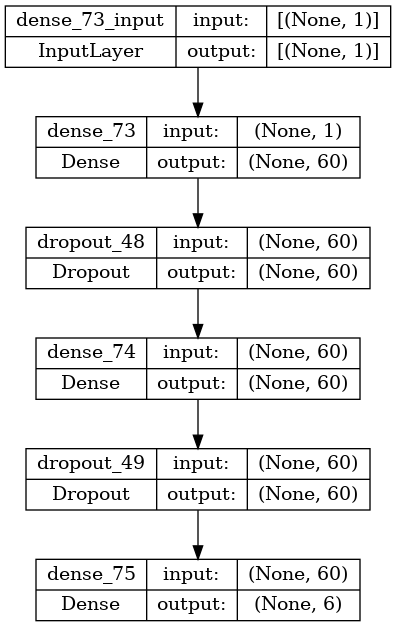

In [1673]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers as WeightRegularizer
from keras.optimizers import SGD
    #SKlearn for metrics and datasplits
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
    #Matplotlib for plotting
from matplotlib import pyplot as plt
from keras.regularizers import l2

    # In[11]:


    #Convert to Numpy arrays
from sklearn.preprocessing import StandardScaler
X = np.array(list(list_x))
y = list_y


# In[12]:


train_size=int(.7* X.shape[0])
X_train, X_test, y_train, y_test = X[0:train_size], X[train_size:],y[0:train_size],y[train_size:]
from keras.utils.vis_utils import plot_model


model = Sequential()
model.add(Dense(60, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.6, input_shape=(1,)))
model.add(Dense(60, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.6, input_shape=(1,)))
model.add(Dense(6, activation='sigmoid'))
    # In[34]:
model.compile(loss='mean_squared_error', metrics=['accuracy'], optimizer=SGD(lr=.001, momentum=0.9, nesterov=True))
model.fit(X_train, y_train, epochs=1, batch_size=2)
    
    
y_pred = model.predict(X_test)
rms = (np.mean((y_test.reshape(-1,1) - y_pred)**2))**0.5
s = np.std(y_test -y_pred)
!pip install pydot
!pip install graphviz
print("Neural Network RMS", rms)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [1674]:
predneuro=model.predict(testY)

540/540 [==============================] - 1s 1ms/step


In [1675]:

yhat = scaler.inverse_transform(predneuro)

In [1676]:
predneuro

array([[0.49911, 0.49911, 0.49911, 0.49911, 0.49911, 0.49911],
       [0.49911, 0.49911, 0.49911, 0.49911, 0.49911, 0.49911],
       [0.49911, 0.49911, 0.49911, 0.49911, 0.49911, 0.49911],
       ...,
       [0.49824, 0.49802, 0.49999, 0.49763, 0.50052, 0.49928],
       [0.49911, 0.49911, 0.49911, 0.49911, 0.49911, 0.49911],
       [0.49911, 0.49911, 0.49911, 0.49911, 0.49911, 0.49911]],
      dtype=float32)

In [1677]:
yhat.mean()

0.49907246

In [1650]:
testY

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])